In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import read_osu_log, read_osu_log_multi, plot_osu

In [3]:
ls osu_log_addon/pt2pt_multi/

run1/  run10/ run2/  run3/  run4/  run5/  run6/  run7/  run8/  run9/


In [4]:
ls osu_log_addon/pt2pt_multi/run1/

intelmpi-efa/ openmpi3/     openmpi4/
intelmpi-tcp/ openmpi3-efa/ openmpi4-efa/


In [5]:
def read_osu_all_runs(suffix, prefix='osu_log_addon/pt2pt_multi/', runs=10):
    file_list = [
        prefix + 'run{}'.format(i) + suffix for i in range(1, 10)  # skip last unfinished one
    ]
    df = read_osu_log_multi(file_list, skiprows=4)
    return df

def stats(df):
    # similar to df.T.describe().T
    return df.apply(['mean', 'std', 'median', 'min', 'max'], axis=1)

In [6]:
mbw_impi_efa = read_osu_all_runs('/intelmpi-efa/mbw_mr.log')
mbw_impi_tcp = read_osu_all_runs('/intelmpi-tcp/mbw_mr.log')
mbw_ompi3 = read_osu_all_runs('/openmpi3/mbw_mr.log')
mbw_ompi3_efa = read_osu_all_runs('/openmpi3-efa/mbw_mr.log')
mbw_ompi4 = read_osu_all_runs('/openmpi4/mbw_mr.log')
mbw_ompi4_efa = read_osu_all_runs('/openmpi4-efa/mbw_mr.log')

In [7]:
mbw_list = [mbw_impi_efa, mbw_impi_tcp, mbw_ompi3, mbw_ompi3_efa, mbw_ompi4, mbw_ompi4_efa]
mpi_cases = ['IntelMPI-EFA', 'IntelMPI-TCP', 'OpenMPI3-TCP', 'OpenMPI3-EFA', 'OpenMPI4-TCP', 'OpenMPI4-EFA']

mbw_mean_all = pd.concat([df.mean(axis=1) for df in mbw_list], keys=mpi_cases, axis=1)
mbw_mean_all

,IntelMPI-EFA,IntelMPI-TCP,OpenMPI3-TCP,OpenMPI3-EFA,OpenMPI4-TCP,OpenMPI4-EFA
1,4.164444,4.970000,8.911111,9.023333,10.005556,9.563333
2,11.457778,10.023333,18.077778,18.563333,20.063333,19.184444
4,22.593333,19.992222,36.776667,37.886667,40.155556,38.270000
8,45.155556,39.776667,73.923333,75.977778,80.282222,76.284444
16,89.457778,79.224444,146.993333,153.911111,159.472222,151.666667
32,179.594444,156.704444,292.995556,306.154444,315.362222,299.974444
64,358.608889,311.397778,552.378889,589.117778,604.218889,575.516667
128,707.318889,613.613333,1066.624444,1125.285556,1157.770000,1101.623333
256,1388.386667,772.440000,2038.815556,2173.053333,2229.157778,2128.963333
512,2651.736667,1515.818889,3721.644444,4014.838889,4094.004444,3917.944444


In [8]:
mbw_std_all = pd.concat([df.std(axis=1) for df in mbw_list], keys=mpi_cases, axis=1)
mbw_std_all

,IntelMPI-EFA,IntelMPI-TCP,OpenMPI3-TCP,OpenMPI3-EFA,OpenMPI4-TCP,OpenMPI4-EFA
1,0.637125,0.055000,1.475241,0.333242,0.133146,1.137475
2,0.116916,0.109430,2.995312,0.592938,0.276541,2.230130
4,0.232271,0.210106,5.733182,0.883431,0.566108,4.923568
8,0.562586,0.458367,11.355412,1.607154,1.030119,10.574571
16,1.428713,0.934065,23.361082,3.423293,2.051504,21.241548
32,2.579894,1.905716,45.228300,4.379815,4.051746,42.259044
64,3.177753,4.049197,120.978034,8.041176,7.370099,77.942193
128,13.611944,8.261215,195.968228,16.384667,16.385983,141.941023
256,22.860588,15.017545,422.516835,29.263033,31.141632,265.625710
512,75.001175,29.281533,899.896139,58.250412,47.581811,480.100308


In [9]:
mbw_max_all = pd.concat([df.max(axis=1) for df in mbw_list], keys=mpi_cases, axis=1)
mbw_max_all

,IntelMPI-EFA,IntelMPI-TCP,OpenMPI3-TCP,OpenMPI3-EFA,OpenMPI4-TCP,OpenMPI4-EFA
1,5.69,5.04,9.65,9.42,10.18,10.07
2,11.66,10.17,19.66,19.17,20.46,20.08
4,23.01,20.29,39.85,39.43,40.98,40.37
8,46.31,40.43,79.74,77.06,81.79,80.53
16,90.79,80.52,158.26,159.21,162.69,160.55
32,186.26,159.49,316.92,313.79,321.24,317.50
64,364.41,317.25,607.02,604.59,613.81,607.14
128,731.41,625.63,1156.15,1157.33,1180.92,1160.71
256,1429.61,794.24,2233.32,2233.08,2275.18,2234.27
512,2784.36,1559.47,4105.72,4133.33,4164.00,4131.25


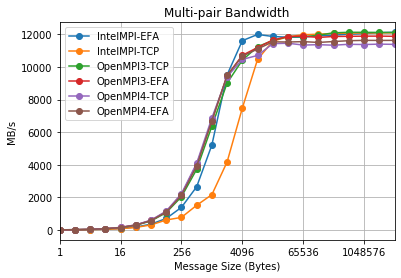

In [10]:
plot_osu(mbw_mean_all)
plt.title('Multi-pair Bandwidth')
plt.ylabel('MB/s');

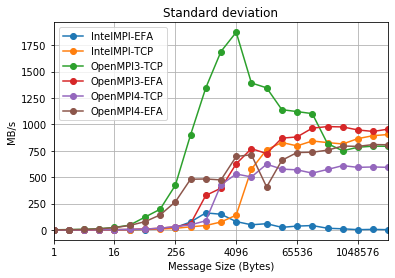

In [11]:
plot_osu(mbw_std_all)
plt.title('Standard deviation')
plt.ylabel('MB/s');

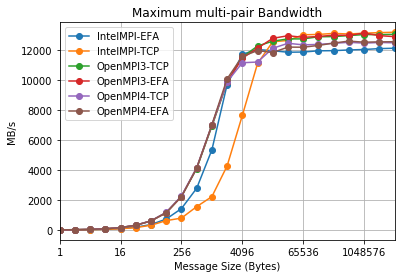

In [12]:
plot_osu(mbw_max_all)
plt.title('Maximum multi-pair Bandwidth')
plt.ylabel('MB/s');